# Taller Practico Clustering y PCA

Juan Esteban Trujillo


## Clustering con K-Means

### Carga y Limpieza: 
Cargue el dataset. Elimine la columna ID_Cliente para el análisis numérico, ya que no aporta información cuantitativa.


In [18]:
import pandas as pd

df = pd.read_csv("data/dataset_clientes_clustering_pca.csv")

print("Dataset Puro: \n" , df.head())

Dataset Puro: 
   ID_Cliente  Ingresos_Anuales_k  Puntuacion_Gasto  Compras_Realizadas  Edad  \
0  CUST_1000                82.8                89                  68    56   
1  CUST_1001                76.5                41                  30    69   
2  CUST_1002                18.6                22                   1    46   
3  CUST_1003                21.3                86                  60    32   
4  CUST_1004                17.1                86                  54    60   

   Visitas_Web_Mes  
0               35  
1               20  
2                1  
3               31  
4               32  


In [19]:
df = df.drop('ID_Cliente', axis=1)

print("\nDataset Limpio: \n", df.head())


Dataset Limpio: 
    Ingresos_Anuales_k  Puntuacion_Gasto  Compras_Realizadas  Edad  \
0                82.8                89                  68    56   
1                76.5                41                  30    69   
2                18.6                22                   1    46   
3                21.3                86                  60    32   
4                17.1                86                  54    60   

   Visitas_Web_Mes  
0               35  
1               20  
2                1  
3               31  
4               32  


### Estandarización (Z-Score): 
K-Means utiliza la distancia Euclidiana. Si una variable tiene magnitudes grandes (ej. Ingresos 100,000) dominará sobre las pequeñas (ej. Visitas 5). Aplique StandardScaler de scikit-learn

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

print("\nDataset Estandarizado: \n", df_scaled)


Dataset Estandarizado: 
 [[ 0.62064074  1.22716188  1.13594447  0.81295917  0.67091174]
 [ 0.44616965 -0.36032688 -0.19072639  1.68057836 -0.2009306 ]
 [-1.15730273 -0.98870784 -1.20318574  0.1455598  -1.30526423]
 ...
 [ 0.78957306  1.42559798  1.76436752  1.2133988   1.54275408]
 [ 0.83388318 -1.02178053 -1.06353618 -0.5885795  -0.89840447]
 [ 0.16923142  0.30112677 -0.05107683  0.74621924 -0.14280778]]


### Método del Codo (Elbow Method): 
Calcule la inercia (WCSS - Within-Cluster Sum of Squares) para k desde 1 hasta 10. Grafique k vs WCSS. Busque el punto de inflexión.

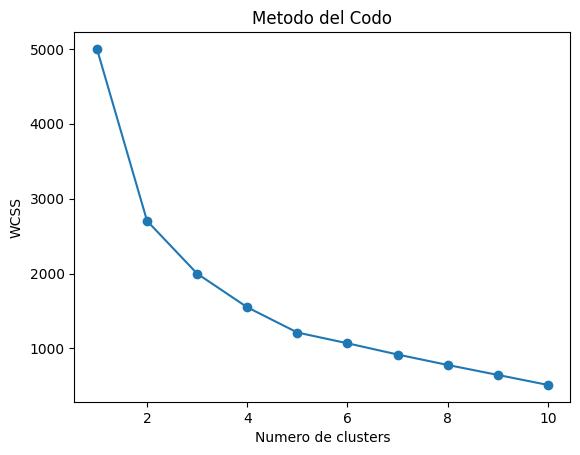

In [21]:
from sklearn.cluster import KMeans
import matplotlib . pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
    
plt.plot ( range (1 , 11) , wcss , marker ='o')
plt.title ('Metodo del Codo')
plt.xlabel ('Numero de clusters')
plt.ylabel ('WCSS')
plt.show () 

### Coeficiente de Silueta (Silhouette Score): 
Calcule el score para diferentes k. Un valor cercano a +1 indica clusters bien definidos; cerca de 0 indica solapamiento.



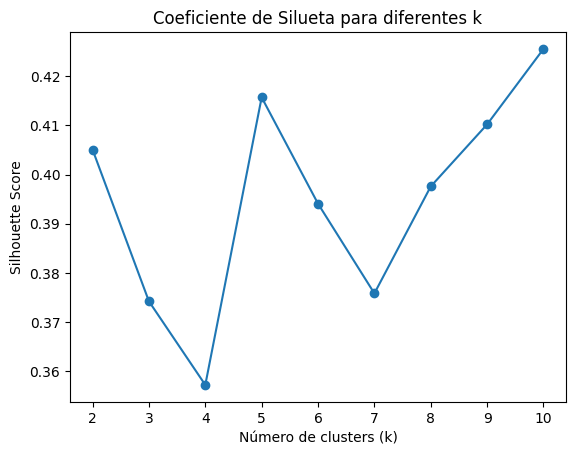

In [22]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta para diferentes k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

### Entrenamiento del Modelo: 
Entrene el modelo K-Means utilizando el k elegido en el paso anterior.

In [23]:
k_optimo = 5
kmeans_final = KMeans(n_clusters=k_optimo, init='k-means++', random_state=42)
kmeans_final.fit(df_scaled)

df['Cluster'] = kmeans_final.labels_

print(f"Modelo K-Means entrenado con k={k_optimo}")
print(f"Inercia final: {kmeans_final.inertia_:.2f}")
print(f"\nDistribución de clientes por cluster:")
print(df['Cluster'].value_counts().sort_index())

silhouette_final = silhouette_score(df_scaled, kmeans_final.labels_)
print(f"\nCoeficiente de Silueta: {silhouette_final:.4f}")

print(df.head(10))

Modelo K-Means entrenado con k=5
Inercia final: 1211.70

Distribución de clientes por cluster:
Cluster
0    208
1    200
2    212
3    182
4    198
Name: count, dtype: int64

Coeficiente de Silueta: 0.4157
   Ingresos_Anuales_k  Puntuacion_Gasto  Compras_Realizadas  Edad  \
0                82.8                89                  68    56   
1                76.5                41                  30    69   
2                18.6                22                   1    46   
3                21.3                86                  60    32   
4                17.1                86                  54    60   
5                52.6                51                  19    25   
6                21.5                24                   8    38   
7               100.6                14                   4    56   
8                24.1                24                  12    36   
9                60.0                49                  26    40   

   Visitas_Web_Mes  Cluster  
0   

### Visualización 3D:
Genere un gráfico de dispersión 3D (usando Plotly o Matplotlib) empleando las variables: Ingresos, Puntuacion_Gasto y Compras_Realizadas, coloreando los puntos según el cluster asignado.

In [25]:
import plotly.express as px

# Crear gráfico 3D con Plotly
fig = px.scatter_3d(
    df,
    x='Ingresos_Anuales_k',
    y='Puntuacion_Gasto',
    z='Compras_Realizadas',
    color='Cluster',
    title='Visualización 3D de Clusters',
    labels={
        'Ingresos_Anuales_k': 'Ingresos Anuales (k)',
        'Puntuacion_Gasto': 'Puntuación Gasto',
        'Compras_Realizadas': 'Compras Realizadas',
        'Cluster': 'Cluster'
    },
    color_continuous_scale='Viridis',
    hover_data=['Cluster']
)

fig.update_layout(
    scene=dict(
        xaxis_title='Ingresos Anuales (k)',
        yaxis_title='Puntuación Gasto',
        zaxis_title='Compras Realizadas'
    ),
    width=1000,
    height=800
)

fig.show()

### Interpretación de Grupos: 
Calcule los promedios de cada variable agrupando por el Cluster asignado (ej. df.groupby(’Cluster’).mea ()). Describa el perfil de cada grupo (ej. “Clientes Ahorradores”, “Clientes VIP”).


In [26]:
# Calcular promedios por cluster
promedios_clusters = df.groupby('Cluster').mean()
print("Promedios de cada variable por Cluster:")
print(promedios_clusters.round(2))

# Calcular tamaño de cada cluster
print("\n" + "="*60)
print("Tamaño de cada cluster:")
print(df['Cluster'].value_counts().sort_index())

# Análisis detallado de cada cluster
print("\n" + "="*60)
print("PERFIL DE CADA GRUPO:\n")

for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}:")
    print(f"{'='*60}")
    cluster_data = promedios_clusters.loc[cluster_id]
    print(cluster_data.to_string())
    
    # Interpretación automática basada en las características
    print(f"\nInterpretación cluster {cluster_id}:")
    
    if cluster_id == 0:
        print("Clientes Ahorradores Senior - Edad avanzada, ingresos altos, muy conservadores.")
    
    if cluster_id == 1:
        print("Clientes VIP/Premium - Mejor segmento con máximos ingresos, gasto y actividad.")
        
    if cluster_id == 2:
        print("Clientes Impulsivos/Gastadores - Bajos ingresos pero gastos muy altos, riesgo potencial.")
    
    if cluster_id == 3:
        print("Clientes Jóvenes Potenciales - Jóvenes con buenos ingresos, bajo gasto pero alto potencial.")
    
    if cluster_id == 4:
        print("Clientes Inactivos/Bajo Valor - Muy bajos ingresos, gasto mínimo y poca actividad.")

Promedios de cada variable por Cluster:
         Ingresos_Anuales_k  Puntuacion_Gasto  Compras_Realizadas   Edad  \
Cluster                                                                    
0                     77.80             37.04               21.04  57.64   
1                     99.61             89.78               80.98  42.90   
2                     22.42             79.25               50.04  43.72   
3                     85.24             30.93               17.57  30.38   
4                     20.30             19.21                5.48  42.68   

         Visitas_Web_Mes  
Cluster                   
0                  14.89  
1                  49.58  
2                  32.91  
3                  12.82  
4                   5.72  

Tamaño de cada cluster:
Cluster
0    208
1    200
2    212
3    182
4    198
Name: count, dtype: int64

PERFIL DE CADA GRUPO:


CLUSTER 0:
Ingresos_Anuales_k    77.796154
Puntuacion_Gasto      37.038462
Compras_Realizadas    21.038462
Ed

## Análisis de Componentes Principales (PCA)

### Matriz de Correlación: 
Antes de aplicar PCA, genere un mapa de calor (heatmap) de correlaciones. Identifique si existen variables altamente correlacionadas (ej. Visitas_Web y Compras). PCA es ideal cuando existe alta correlación.


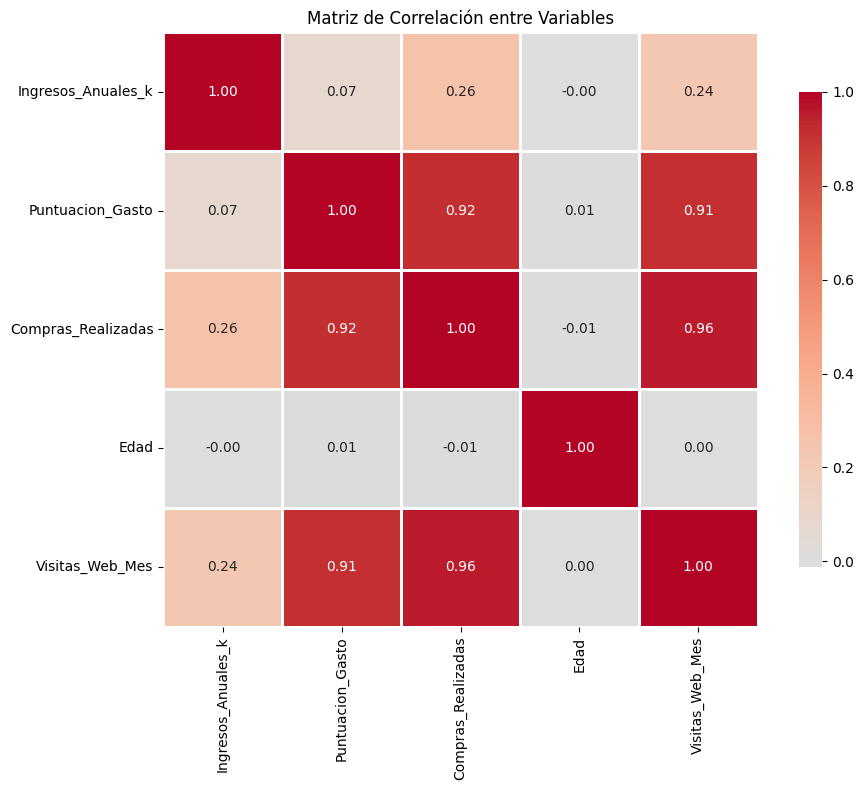


Correlaciones altas (> 0.7):
Puntuacion_Gasto <-> Compras_Realizadas: 0.92
Puntuacion_Gasto <-> Visitas_Web_Mes: 0.91
Compras_Realizadas <-> Visitas_Web_Mes: 0.96


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df.drop('Cluster', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)

plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()

# Identificar correlaciones altas
print("\nCorrelaciones altas (> 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")



### 3. Análisis de Varianza Explicada: 
Utilice el atributo explained_variance_ratio_. Genere un gráfico de “Varianza Explicada Acumulada”

### Caso A (Sin Estandarizar): 
Aplique PCA a los datos crudos. Observe la varianza explicada. ¿Qué variable domina el primer componente? (Probablemente la de mayor magnitud numérica).


PCA SIN ESTANDARIZAR:
Varianza explicada por cada componente:
[0.57407501 0.34095174 0.06313039 0.01701748 0.00482538]

Varianza acumulada:
[0.57407501 0.91502676 0.97815714 0.99517462 1.        ]

Componentes principales (loadings):

PC1:
  Ingresos_Anuales_k: 0.3611
  Puntuacion_Gasto: 0.6050
  Compras_Realizadas: 0.6120
  Edad: -0.0010
  Visitas_Web_Mes: 0.3592

PC2:
  Ingresos_Anuales_k: 0.9242
  Puntuacion_Gasto: -0.3332
  Compras_Realizadas: -0.1550
  Edad: -0.0009
  Visitas_Web_Mes: -0.1038

PC3:
  Ingresos_Anuales_k: 0.0050
  Puntuacion_Gasto: 0.0214
  Compras_Realizadas: -0.0238
  Edad: 0.9995
  Visitas_Web_Mes: 0.0025

PC4:
  Ingresos_Anuales_k: 0.1239
  Puntuacion_Gasto: 0.7225
  Compras_Realizadas: -0.5981
  Edad: -0.0296
  Visitas_Web_Mes: -0.3225

PC5:
  Ingresos_Anuales_k: 0.0070
  Puntuacion_Gasto: -0.0218
  Compras_Realizadas: -0.4930
  Edad: -0.0135
  Visitas_Web_Mes: 0.8696

Variable que domina el PC1: Compras_Realizadas (loading: 0.6120)


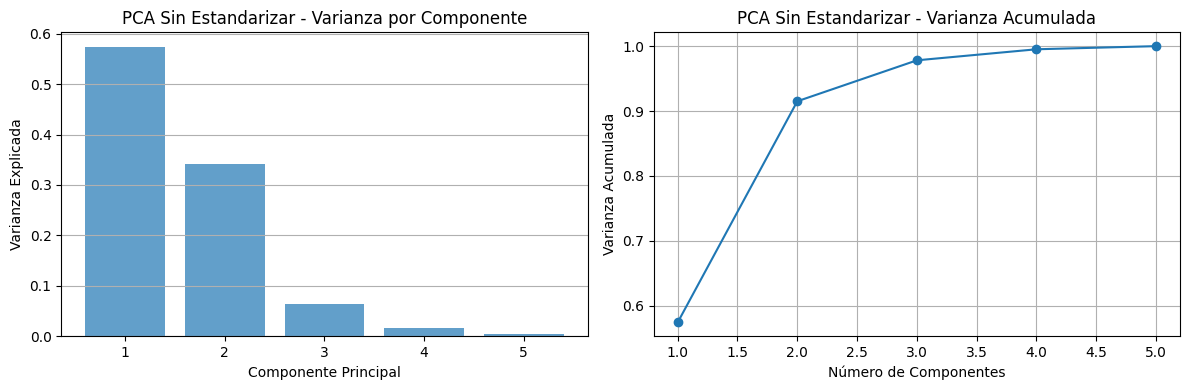

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preparar datos sin estandarizar (datos crudos)
df_sin_cluster = df.drop('Cluster', axis=1)

# Aplicar PCA sin estandarizar
pca_sin_escalar = PCA()
pca_sin_escalar.fit(df_sin_cluster)

# Varianza explicada
varianza_explicada = pca_sin_escalar.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

print("PCA SIN ESTANDARIZAR:")
print("="*60)
print(f"Varianza explicada por cada componente:\n{varianza_explicada}")
print(f"\nVarianza acumulada:\n{varianza_acumulada}")

# Componentes principales
print(f"\nComponentes principales (loadings):")
for i, component in enumerate(pca_sin_escalar.components_):
    print(f"\nPC{i+1}:")
    for j, var_name in enumerate(df_sin_cluster.columns):
        print(f"  {var_name}: {component[j]:.4f}")

# Variable que domina el primer componente
pc1_loadings = pca_sin_escalar.components_[0]
var_dominante = df_sin_cluster.columns[abs(pc1_loadings).argmax()]
print(f"\nVariable que domina el PC1: {var_dominante} (loading: {pc1_loadings[abs(pc1_loadings).argmax()]:.4f})")

# Graficar varianza explicada
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(varianza_explicada)+1), varianza_explicada, alpha=0.7)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('PCA Sin Estandarizar - Varianza por Componente')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('PCA Sin Estandarizar - Varianza Acumulada')
plt.grid()

plt.tight_layout()
plt.show()

### Caso B (Estandarizado): 
Aplique PCA a los datos escalados (Z-Score). Compare los resultados. Use este modelo para los siguientes pasos.


PCA ESTANDARIZADO (Z-Score):
Varianza explicada por cada componente:
[0.58248182 0.20007704 0.19316888 0.0166705  0.00760176]

Varianza acumulada:
[0.58248182 0.78255886 0.97572774 0.99239824 1.        ]

Componentes principales (loadings):

PC1:
  Ingresos_Anuales_k: 0.1712
  Puntuacion_Gasto: 0.5549
  Compras_Realizadas: 0.5774
  Edad: -0.0019
  Visitas_Web_Mes: 0.5739

PC2:
  Ingresos_Anuales_k: -0.0744
  Puntuacion_Gasto: 0.0267
  Compras_Realizadas: -0.0081
  Edad: 0.9968
  Visitas_Web_Mes: 0.0078

PC3:
  Ingresos_Anuales_k: 0.9691
  Puntuacion_Gasto: -0.2280
  Compras_Realizadas: -0.0209
  Edad: 0.0787
  Visitas_Web_Mes: -0.0473

PC4:
  Ingresos_Anuales_k: 0.1535
  Puntuacion_Gasto: 0.7853
  Compras_Realizadas: -0.2660
  Edad: -0.0076
  Visitas_Web_Mes: -0.5375

PC5:
  Ingresos_Anuales_k: -0.0497
  Puntuacion_Gasto: -0.1505
  Compras_Realizadas: 0.7716
  Edad: 0.0114
  Visitas_Web_Mes: -0.6159

COMPARACION: SIN ESTANDARIZAR vs ESTANDARIZADO
Componente  Sin Escalar (%)  Escalado (

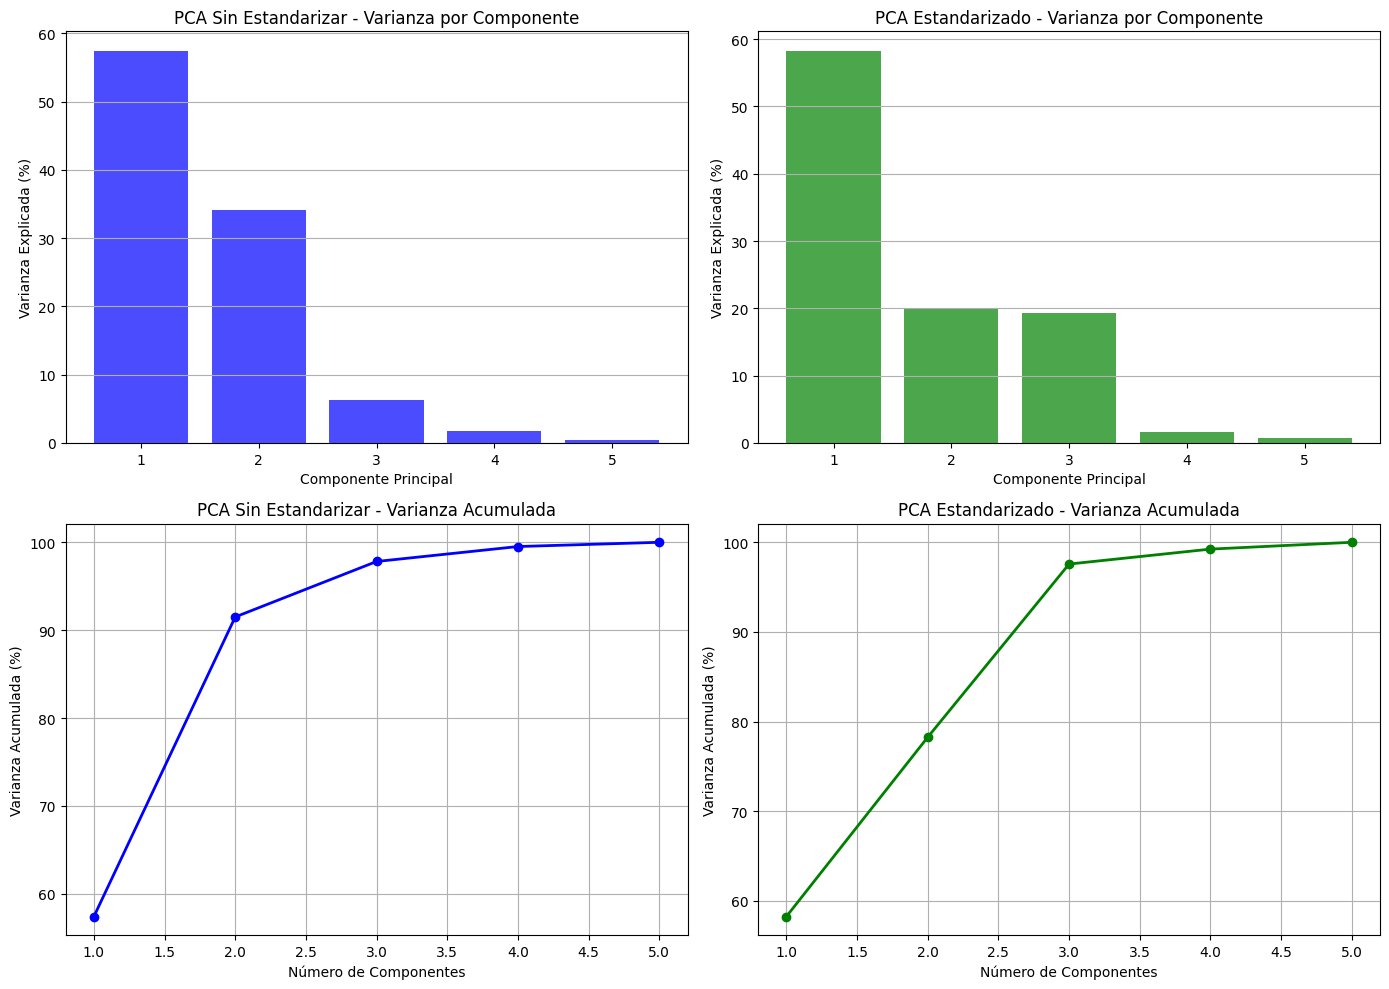

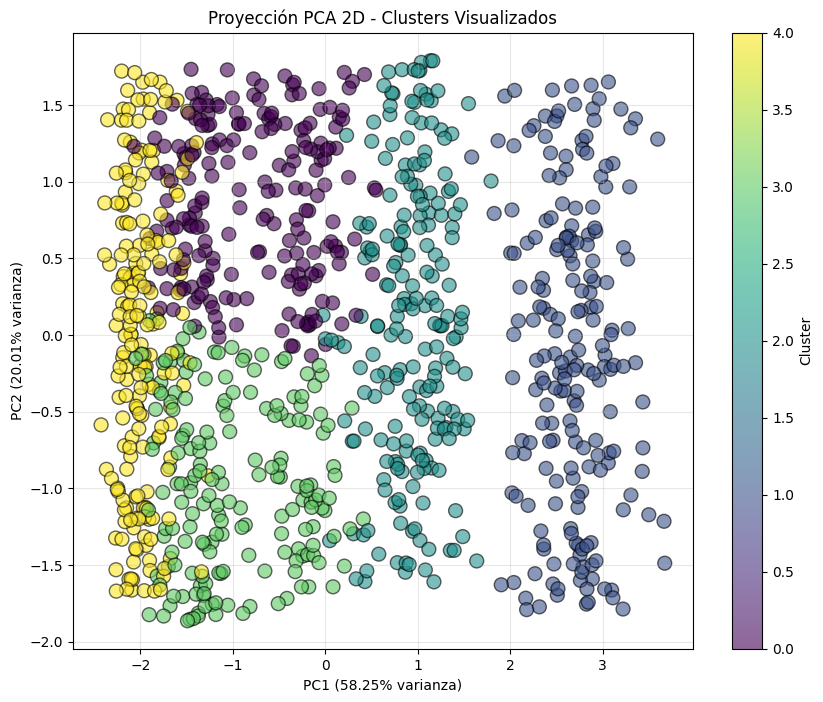

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA a datos estandarizados
pca_escalado = PCA()
pca_escalado.fit(df_scaled)

# Varianza explicada
varianza_explicada_escalado = pca_escalado.explained_variance_ratio_
varianza_acumulada_escalado = varianza_explicada_escalado.cumsum()

print("PCA ESTANDARIZADO (Z-Score):")
print("="*60)
print(f"Varianza explicada por cada componente:\n{varianza_explicada_escalado}")
print(f"\nVarianza acumulada:\n{varianza_acumulada_escalado}")

# Componentes principales
print(f"\nComponentes principales (loadings):")
for i, component in enumerate(pca_escalado.components_):
    print(f"\nPC{i+1}:")
    for j, var_name in enumerate(df.drop('Cluster', axis=1).columns):
        print(f"  {var_name}: {component[j]:.4f}")

# Comparación: Sin escalar vs Escalado
print("\n" + "="*60)
print("COMPARACION: SIN ESTANDARIZAR vs ESTANDARIZADO")
print("="*60)

comparison_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(5)],
    'Sin Escalar (%)': varianza_explicada * 100,
    'Escalado (%)': varianza_explicada_escalado * 100,
    'Diferencia (%)': (varianza_explicada - varianza_explicada_escalado) * 100
})

print(comparison_df.to_string(index=False))

# Graficar comparación
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Varianza individual - Sin escalar
axes[0, 0].bar(range(1, 6), varianza_explicada * 100, alpha=0.7, color='blue')
axes[0, 0].set_title('PCA Sin Estandarizar - Varianza por Componente')
axes[0, 0].set_xlabel('Componente Principal')
axes[0, 0].set_ylabel('Varianza Explicada (%)')
axes[0, 0].grid(axis='y')

# Varianza individual - Escalado
axes[0, 1].bar(range(1, 6), varianza_explicada_escalado * 100, alpha=0.7, color='green')
axes[0, 1].set_title('PCA Estandarizado - Varianza por Componente')
axes[0, 1].set_xlabel('Componente Principal')
axes[0, 1].set_ylabel('Varianza Explicada (%)')
axes[0, 1].grid(axis='y')

# Varianza acumulada - Sin escalar
axes[1, 0].plot(range(1, 6), varianza_acumulada * 100, marker='o', linewidth=2, color='blue')
axes[1, 0].set_title('PCA Sin Estandarizar - Varianza Acumulada')
axes[1, 0].set_xlabel('Número de Componentes')
axes[1, 0].set_ylabel('Varianza Acumulada (%)')
axes[1, 0].grid()

# Varianza acumulada - Escalado
axes[1, 1].plot(range(1, 6), varianza_acumulada_escalado * 100, marker='o', linewidth=2, color='green')
axes[1, 1].set_title('PCA Estandarizado - Varianza Acumulada')
axes[1, 1].set_xlabel('Número de Componentes')
axes[1, 1].set_ylabel('Varianza Acumulada (%)')
axes[1, 1].grid()

plt.tight_layout()
plt.show()

# Proyectar datos en los 2 primeros componentes
pca_2d = PCA(n_components=2)
datos_pca_2d = pca_2d.fit_transform(df_scaled)

# Crear DataFrame con las proyecciones
df_pca = pd.DataFrame(
    datos_pca_2d,
    columns=['PC1', 'PC2']
)
df_pca['Cluster'] = df['Cluster'].values

# Visualizar PC1 vs PC2 coloreado por clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], 
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% varianza)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% varianza)')
plt.title('Proyección PCA 2D - Clusters Visualizados')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

### Pregunta clave: 
¿Cuántos componentes se necesitan para explicar al menos el 80 % de la varianza total de los datos?

Se necesitan 3 componentes para explicar al menos el 80 % de la varianza total de los datos.


### Interpretación de los Componentes (Loading Vectors): 
Analice los vectores propios (components_).
- ¿Qué variables tienen mayor peso en el PC1?

Compras_Realizadas (0.5774)
Puntuacion_Gasto (0.5549)
Visitas_Web_Mes (0.5739)

- ¿Qué representa el PC1 en el “mundo real”? (Ej. ¿Representa el “Nivel de Gasto Total”?).

PC1 representa "Nivel de Actividad y Gasto del Cliente"

Es un índice que combina:

Frecuencia de compras
Puntuación de gasto
Actividad web
Interpretación práctica:

Clientes con PC1 alto = Clientes VIP/Gastadores activos
Clientes con PC1 bajo = Clientes inactivos/conservadores

### Biplot: 
Genere un gráfico de los dos primeros componentes (PC1 vs PC2). Proyecte los vectores de las variables originales sobre este plano para entender la dirección de los datos.

BIPLOT: Visualización de PC1 vs PC2 con vectores de variables


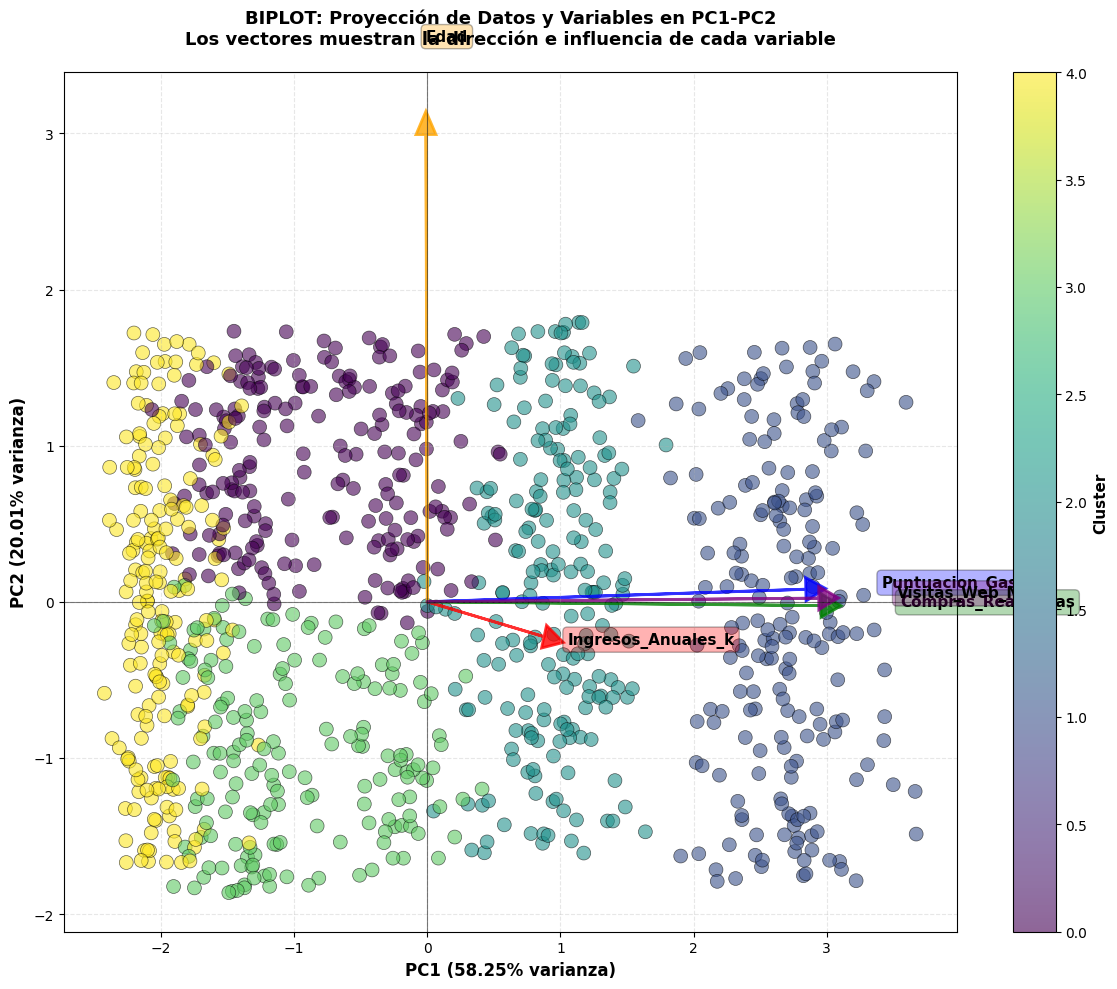


INTERPRETACIÓN DEL BIPLOT

¿QUÉ MUESTRA ESTE GRÁFICO?

1. PUNTOS (círculos de colores):
   - Cada punto = UN CLIENTE
   - Color = CLUSTER al que pertenece
   - Posición X = Valor en PC1 (Actividad/Gasto)
   - Posición Y = Valor en PC2 (Edad)

2. VECTORES (flechas):
   - Cada flecha = UNA VARIABLE ORIGINAL
   - Dirección = En qué sentido influye en PC1 y PC2
   - Largo = Importancia relativa

3. ÁNGULOS ENTRE VECTORES:
   - Ángulo pequeño (< 90°) → Variables CORRELACIONADAS
   - Ángulo grande (> 90°) → Variables INDEPENDIENTES
   - Vectores opuestos → Correlación NEGATIVA

¿QUÉ PUEDO DEDUCIR?


CORRELACIONES ENTRE VARIABLES (basadas en ángulos):
  Ingresos_Anuales_k <-> Puntuacion_Gasto: 15.9° → MUY CORRELACIONADAS (fuerte)
  Ingresos_Anuales_k <-> Compras_Realizadas: 13.8° → MUY CORRELACIONADAS (fuerte)
  Ingresos_Anuales_k <-> Edad: 104.5° → Débilmente correlacionadas
  Ingresos_Anuales_k <-> Visitas_Web_Mes: 14.8° → MUY CORRELACIONADAS (fuerte)
  Puntuacion_Gasto <-> Compras_Realiza

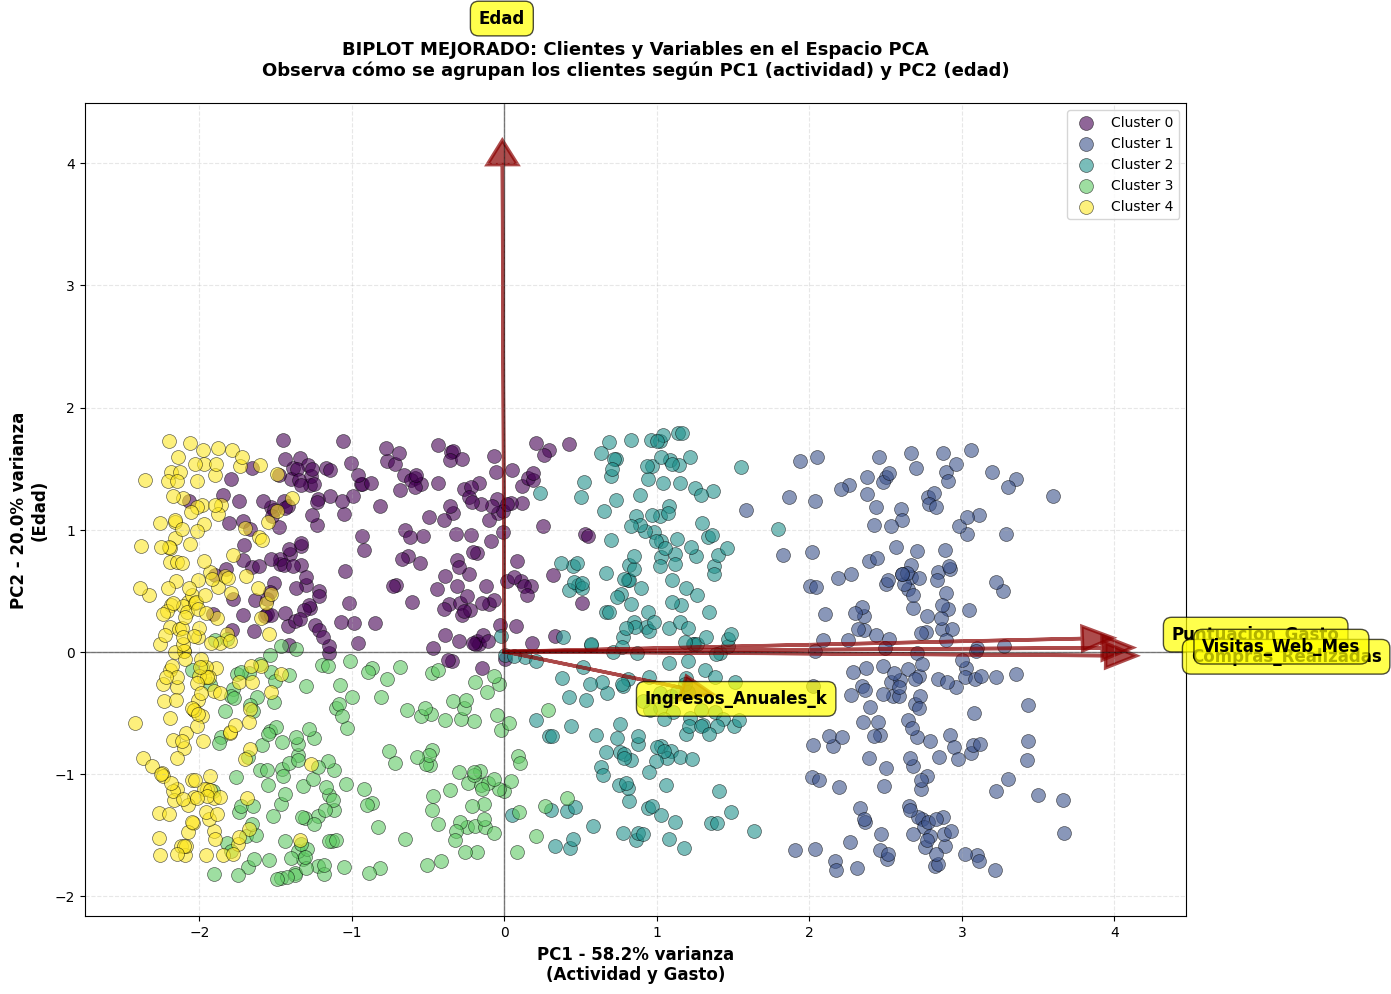


✓ Biplot generado correctamente


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print("="*70)
print("BIPLOT: Visualización de PC1 vs PC2 con vectores de variables")
print("="*70)

# Obtener los loadings (pesos de las variables)
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)
variables = df.drop('Cluster', axis=1).columns

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# 1. Graficar los puntos (datos proyectados en PC1 y PC2)
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], 
                     c=df_pca['Cluster'], 
                     cmap='viridis', 
                     s=100, 
                     alpha=0.6, 
                     edgecolors='black',
                     linewidth=0.5)

# 2. Graficar los vectores de las variables originales
scale_factor = 3  # Factor de escala para ver mejor los vectores
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, var in enumerate(variables):
    # Coordenadas del vector
    ax.arrow(0, 0, 
             loadings[i, 0] * scale_factor, 
             loadings[i, 1] * scale_factor,
             head_width=0.15, 
             head_length=0.15, 
             fc=colors[i % len(colors)], 
             ec=colors[i % len(colors)], 
             alpha=0.8,
             linewidth=2)
    
    # Etiqueta de la variable
    ax.text(loadings[i, 0] * scale_factor * 1.2,
            loadings[i, 1] * scale_factor * 1.2,
            var, 
            fontsize=11, 
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', 
                     facecolor=colors[i % len(colors)], 
                     alpha=0.3))

# Configuración de ejes
ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% varianza)', 
              fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% varianza)', 
              fontsize=12, fontweight='bold')
ax.set_title('BIPLOT: Proyección de Datos y Variables en PC1-PC2\n' + 
             'Los vectores muestran la dirección e influencia de cada variable',
             fontsize=13, fontweight='bold', pad=20)

# Líneas de referencia
ax.grid(True, alpha=0.3, linestyle='--')
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.8, alpha=0.5)
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.8, alpha=0.5)

# Colorbar para clusters
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# INTERPRETACIÓN DEL BIPLOT
# ============================================================

print("\n" + "="*70)
print("INTERPRETACIÓN DEL BIPLOT")
print("="*70)

print("""
¿QUÉ MUESTRA ESTE GRÁFICO?

1. PUNTOS (círculos de colores):
   - Cada punto = UN CLIENTE
   - Color = CLUSTER al que pertenece
   - Posición X = Valor en PC1 (Actividad/Gasto)
   - Posición Y = Valor en PC2 (Edad)

2. VECTORES (flechas):
   - Cada flecha = UNA VARIABLE ORIGINAL
   - Dirección = En qué sentido influye en PC1 y PC2
   - Largo = Importancia relativa
   
3. ÁNGULOS ENTRE VECTORES:
   - Ángulo pequeño (< 90°) → Variables CORRELACIONADAS
   - Ángulo grande (> 90°) → Variables INDEPENDIENTES
   - Vectores opuestos → Correlación NEGATIVA

¿QUÉ PUEDO DEDUCIR?
""")

# Análisis de correlaciones entre vectores
print("\nCORRELACIONES ENTRE VARIABLES (basadas en ángulos):")
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=variables)

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i < j:
            # Calcular ángulo entre vectores
            v1 = loadings_df.loc[var1].values
            v2 = loadings_df.loc[var2].values
            
            cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
            angle_deg = np.degrees(np.arccos(np.clip(cos_angle, -1, 1)))
            
            if angle_deg < 60:
                relationship = "MUY CORRELACIONADAS (fuerte)"
            elif angle_deg < 90:
                relationship = "Correlacionadas (moderada)"
            elif angle_deg < 120:
                relationship = "Débilmente correlacionadas"
            else:
                relationship = "ANTI-CORRELACIONADAS (opuestas)"
            
            print(f"  {var1} <-> {var2}: {angle_deg:.1f}° → {relationship}")

# ============================================================
# BIPLOT ALTERNATIVO CON ORIGEN DE COORDENADAS
# ============================================================

print("\n" + "="*70)
print("Generando segundo Biplot mejorado...")
print("="*70)

fig, ax = plt.subplots(figsize=(14, 10))

# Graficar puntos colorados por cluster
unique_clusters = df_pca['Cluster'].unique()
colors_scatter = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

for cluster_id, color in zip(sorted(unique_clusters), colors_scatter):
    mask = df_pca['Cluster'] == cluster_id
    ax.scatter(df_pca.loc[mask, 'PC1'], 
               df_pca.loc[mask, 'PC2'],
               label=f'Cluster {cluster_id}',
               s=100, alpha=0.6, 
               edgecolors='black', linewidth=0.5,
               color=color)

# Escalar loadings
scale = 4
for i, var in enumerate(variables):
    ax.arrow(0, 0,
             loadings[i, 0] * scale,
             loadings[i, 1] * scale,
             head_width=0.2, head_length=0.2,
             fc='darkred', ec='darkred', alpha=0.7, linewidth=2.5)
    
    # Texto con mejor posicionamiento
    offset = 1.3
    ax.text(loadings[i, 0] * scale * offset,
            loadings[i, 1] * scale * offset,
            var, fontsize=12, fontweight='bold',
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.5', 
                     facecolor='yellow', alpha=0.7, edgecolor='black'))

# Estilos
ax.set_xlabel(f'PC1 - {pca_2d.explained_variance_ratio_[0]*100:.1f}% varianza\n(Actividad y Gasto)', 
              fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 - {pca_2d.explained_variance_ratio_[1]*100:.1f}% varianza\n(Edad)', 
              fontsize=12, fontweight='bold')
ax.set_title('BIPLOT MEJORADO: Clientes y Variables en el Espacio PCA\n' +
             'Observa cómo se agrupan los clientes según PC1 (actividad) y PC2 (edad)',
             fontsize=13, fontweight='bold', pad=20)

ax.grid(True, alpha=0.3, linestyle='--')
ax.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='k', linestyle='-', linewidth=1, alpha=0.5)
ax.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

print("\n Biplot generado correctamente")

### Integración (PCA + Clustering)
1. Tome los datos transformados por PCA (ej. solo las primeras 2 o 3 componentes principales).
2. Aplique K-Means sobre estos datos reducidos.
3. Compare los resultados con el clustering original. ¿Mejoró la separación visual? ¿Se redujo
el tiempo de cómputo?


INTEGRACIÓN: PCA + CLUSTERING

Datos originales: (1000, 5)
Datos PCA-2D: (1000, 2)
Datos PCA-3D: (1000, 3)


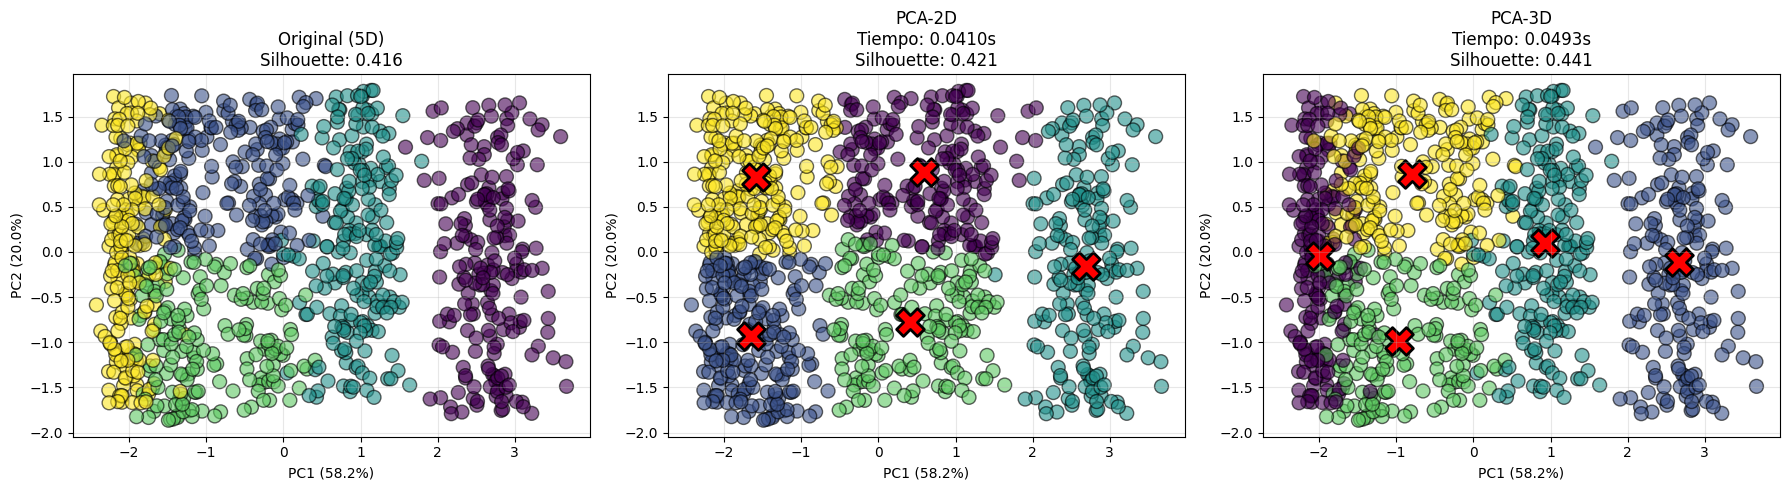


COMPARACIÓN DE RESULTADOS

       Método  Tiempo (seg)  Silhouette Mejora de tiempo
Original (5D)      0.072250    0.416230               0%
       PCA-2D      0.040984    0.421106            43.3%
       PCA-3D      0.049333    0.440536            31.7%


In [35]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("="*70)
print("INTEGRACIÓN: PCA + CLUSTERING")
print("="*70)

# PASO 1: Reducir dimensionalidad con PCA
pca_2comp = PCA(n_components=2)
datos_pca_2d = pca_2comp.fit_transform(df_scaled)

pca_3comp = PCA(n_components=3)
datos_pca_3d = pca_3comp.fit_transform(df_scaled)

print(f"\nDatos originales: {df_scaled.shape}")
print(f"Datos PCA-2D: {datos_pca_2d.shape}")
print(f"Datos PCA-3D: {datos_pca_3d.shape}")

# PASO 2: Aplicar K-Means
inicio_original = time.time()
kmeans_original = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(df_scaled)
tiempo_original = time.time() - inicio_original

inicio_2d = time.time()
kmeans_pca_2d = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
labels_pca_2d = kmeans_pca_2d.fit_predict(datos_pca_2d)
tiempo_2d = time.time() - inicio_2d

inicio_3d = time.time()
kmeans_pca_3d = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
labels_pca_3d = kmeans_pca_3d.fit_predict(datos_pca_3d)
tiempo_3d = time.time() - inicio_3d

# PASO 3: Calcular métricas
silhouette_original = silhouette_score(df_scaled, labels_original)
silhouette_pca_2d = silhouette_score(datos_pca_2d, labels_pca_2d)
silhouette_pca_3d = silhouette_score(datos_pca_3d, labels_pca_3d)

# PASO 4: Visualizar
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original
axes[0].scatter(datos_pca_2d[:, 0], datos_pca_2d[:, 1], 
               c=labels_original, cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[0].set_xlabel(f'PC1 ({pca_2comp.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca_2comp.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title(f'Original (5D)\nSilhouette: {silhouette_original:.3f}')
axes[0].grid(True, alpha=0.3)

# PCA-2D
axes[1].scatter(datos_pca_2d[:, 0], datos_pca_2d[:, 1], 
               c=labels_pca_2d, cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[1].scatter(kmeans_pca_2d.cluster_centers_[:, 0], 
               kmeans_pca_2d.cluster_centers_[:, 1],
               c='red', marker='X', s=400, edgecolors='black', linewidth=2)
axes[1].set_xlabel(f'PC1 ({pca_2comp.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca_2comp.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title(f'PCA-2D\nTiempo: {tiempo_2d:.4f}s\nSilhouette: {silhouette_pca_2d:.3f}')
axes[1].grid(True, alpha=0.3)

# PCA-3D
axes[2].scatter(datos_pca_3d[:, 0], datos_pca_3d[:, 1], 
               c=labels_pca_3d, cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[2].scatter(kmeans_pca_3d.cluster_centers_[:, 0], 
               kmeans_pca_3d.cluster_centers_[:, 1],
               c='red', marker='X', s=400, edgecolors='black', linewidth=2)
axes[2].set_xlabel(f'PC1 ({pca_3comp.explained_variance_ratio_[0]*100:.1f}%)')
axes[2].set_ylabel(f'PC2 ({pca_3comp.explained_variance_ratio_[1]*100:.1f}%)')
axes[2].set_title(f'PCA-3D\nTiempo: {tiempo_3d:.4f}s\nSilhouette: {silhouette_pca_3d:.3f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 5: Comparación
print("\n" + "="*70)
print("COMPARACIÓN DE RESULTADOS")
print("="*70)

comparison = pd.DataFrame({
    'Método': ['Original (5D)', 'PCA-2D', 'PCA-3D'],
    'Tiempo (seg)': [tiempo_original, tiempo_2d, tiempo_3d],
    'Silhouette': [silhouette_original, silhouette_pca_2d, silhouette_pca_3d],
    'Mejora de tiempo': [
        '0%',
        f'{((tiempo_original - tiempo_2d) / tiempo_original * 100):.1f}%',
        f'{((tiempo_original - tiempo_3d) / tiempo_original * 100):.1f}%'
    ]
})

print("\n" + comparison.to_string(index=False))

## Preguntas Conceptuales de Selección Múltiple

---

### Pregunta 1: Sobre la Distancia en K-Means

Si usted cambia las unidades de la variable "Ingresos" de miles de dólares a pesos (multiplicando por 4000), pero mantiene la "Edad" en años, y ejecuta K-Means sin estandarizar:

- a) El resultado será idéntico porque K-Means es invariante a la escala.
- _**b) La variable "Ingresos" dominará el cálculo de la distancia, haciendo que la "Edad" sea irrelevante para el agrupamiento.**_
- c) La variable "Edad" dominará el cálculo por tener valores más pequeños.
- d) El algoritmo fallará y dará error.

---

### Pregunta 2: Sobre el Método del Codo

Al graficar la inercia (WCSS - Within-Cluster Sum of Squares) vs el número de clusters k, buscamos:

- a) El punto donde la inercia es 0.
- b) El punto donde la inercia es máxima.
- _**c) El punto donde la reducción de la inercia deja de ser significativa (se aplana la curva).**_
- d) Siempre elegir el k más alto posible.

---

### Pregunta 3: Sobre PCA y Varianza

El primer componente principal (PC1) se calcula de tal manera que:

- a) Minimiza la correlación entre las variables originales.
- _**b) Captura la mayor cantidad de varianza posible de los datos originales en una sola dirección.**_
- c) Siempre es igual al promedio de todas las variables.
- d) Es ortogonal a la dirección de máxima varianza.

---

### Pregunta 4: Interpretación de Componentes

Si en el PC1, las variables "Compras", "Gasto" y "Visitas" tienen pesos positivos altos (cargas > 0.8), podríamos decir que el PC1 representa:

- a) La edad del cliente.
- _**b) Un factor de "Engagement" o actividad comercial del cliente.**_
- c) El ahorro del cliente.
- d) Ruido aleatorio.